# OLS Regression - Predict cars price

In [1]:
import pandas as pd 
import numpy as np 

CarData = pd.read_csv("autos.csv", encoding="latin_1")

CarData.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [2]:
CarData.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [3]:
CarData.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [4]:
New_cols = ['name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage']

CarData = CarData[New_cols]
CarData.head(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [5]:
print(CarData.dtypes)


name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object


### Perform univariate analysis on the dataset 
##### (1) Find the mean, median, Standard Deviation, Mode of continous variables 

In [6]:

CarData.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


#### (2) Get the frequency distribution of categorical variables


In [7]:
CarData['name'].value_counts()

Ford_Fiesta                                                             657
BMW_318i                                                                627
Opel_Corsa                                                              622
Volkswagen_Golf_1.4                                                     603
BMW_316i                                                                523
BMW_320i                                                                492
Volkswagen_Polo                                                         475
Renault_Twingo                                                          447
Volkswagen_Golf                                                         428
Volkswagen_Golf_1.6                                                     413
Volkswagen_Polo_1.2                                                     412
BMW_116i                                                                394
Opel_Corsa_1.2_16V                                                      373
Opel_Corsa_B

In [8]:
CarData['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [9]:
CarData['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [10]:
CarData['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [11]:
CarData['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [12]:
CarData['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [13]:
CarData['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [14]:
CarData['model'].value_counts()

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ka                     2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [15]:
CarData['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

### (3) Check if there any missing values


In [16]:
CarData['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [17]:
CarData.isnull().values.any()

True

In [18]:
CarData.isnull().sum()

name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [19]:
CarData['notRepairedDamage'].fillna('norep', inplace=True)
CarData = CarData.dropna()
CarData.isnull().values.any()

False

### (4) Treat outliers


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#computing percentiles
low = .05
high = .95
quant_df = CarData.quantile([low, high])
print(quant_df)

        price  yearOfRegistration  powerPS  kilometer  monthOfRegistration
0.05    380.0              1993.0      0.0    40000.0                  1.0
0.95  20900.0              2012.0    235.0   150000.0                 12.0


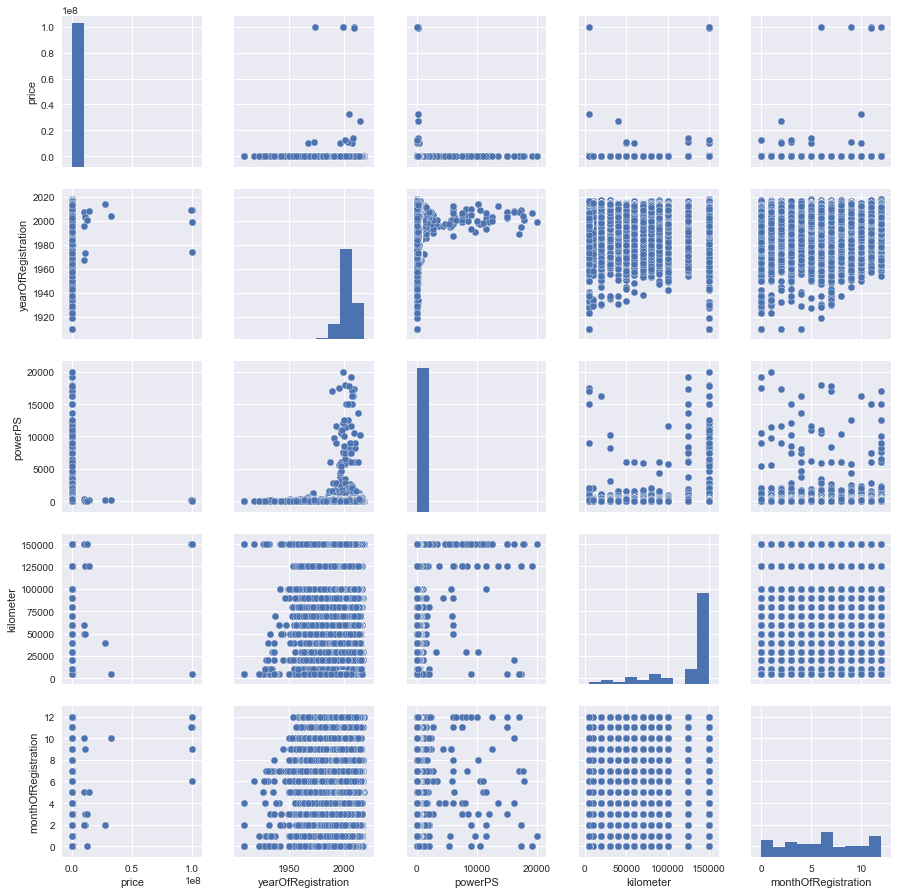

In [21]:
sns.pairplot(CarData)
plt.show()

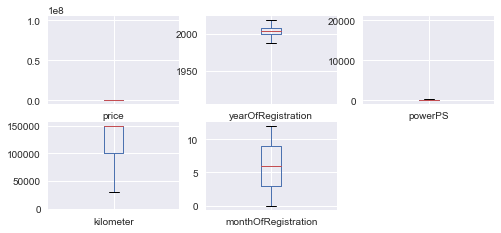

In [22]:
CarData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

### Zoom in at price plot 

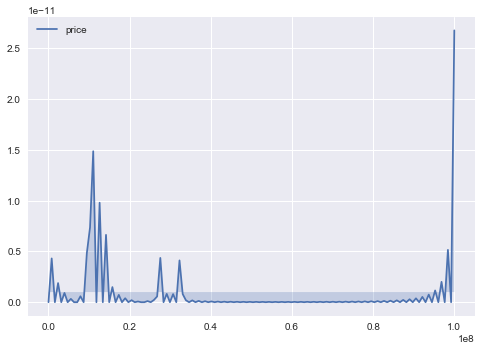

In [23]:


sns.kdeplot(CarData.price, shade = True)
plt.show()

### Filtering values based on computed percentiles for price


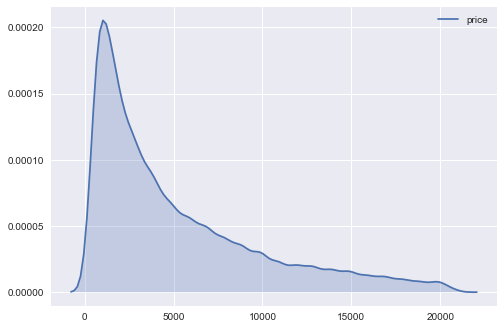

In [24]:

P = np.percentile(CarData.price, [5, 95])
new_CarData = CarData[(CarData.price > P[0]) & (CarData.price < P[1])]

sns.kdeplot(new_CarData.price, shade = True)
plt.show()

### Zoom at powerPS plot 

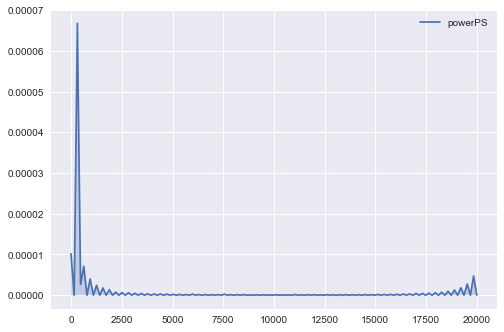

In [25]:
sns.kdeplot(new_CarData.powerPS, shade = True)
plt.show()

### Filtering values based on computed percentiles for powerPS


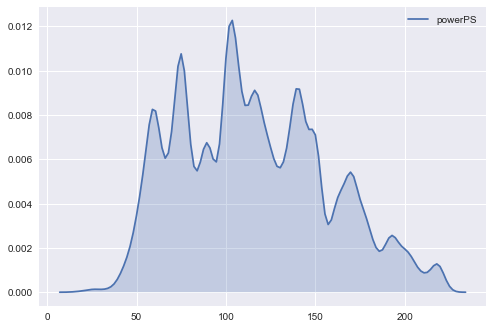

In [26]:
P2 = np.percentile(new_CarData.powerPS, [5, 95])
new_CarData = new_CarData[(new_CarData.powerPS > P2[0]) & (new_CarData.powerPS < P2[1])]

sns.kdeplot(new_CarData.powerPS, shade = True)
plt.show()

### now outliers are removed from both price and powerPS

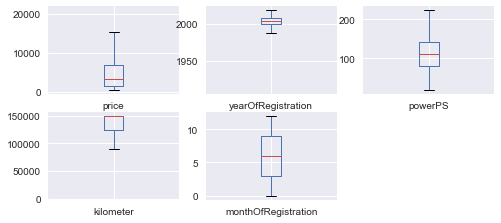

In [27]:
new_CarData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

### (5) Standardize the data

In [28]:
import sklearn.preprocessing as skl

Num_cols = ['price','yearOfRegistration','powerPS','kilometer', 'monthOfRegistration']

CarDataNum = new_CarData[Num_cols]

stdCarData = skl.scale(CarDataNum)
stdCarData = pd.DataFrame(stdCarData, index=CarDataNum.index, columns=CarDataNum.columns)
stdCarData.apply(np.mean)

price                 -2.957249e-16
yearOfRegistration     7.338327e-15
powerPS                8.818078e-17
kilometer              7.088357e-16
monthOfRegistration    2.764146e-16
dtype: float64

In [29]:
stdCarData.apply(np.std)


price                  1.0
yearOfRegistration     1.0
powerPS                1.0
kilometer              1.0
monthOfRegistration    1.0
dtype: float64

In [30]:
stdCarData.head(5)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
2,1.091439,0.171323,1.151896,-0.053783,0.528474
3,-0.768009,-0.316893,-0.977688,0.617914,-0.044820
4,-0.297546,0.822279,-1.122887,-0.994158,0.241827
5,-0.958434,-1.293326,-0.324293,0.617914,1.101767
6,-0.611188,0.171323,-0.154894,0.617914,0.528474


### (6) Try to create new variables that you feel will give you a better understanding of the data
#### it would make more sense use year of registration to calculate new variable called CarAge

In [31]:
import datetime
now = datetime.datetime.now()

new_CarData['CarAge'] = now.year - new_CarData['yearOfRegistration']

# remove year and month Of Registration columns
New_cols = ['name', 'brand', 'model', 'seller', 'offerType', 'price', 'CarAge', 'abtest',
      'vehicleType', 'gearbox', 'powerPS',
      'kilometer', 'fuelType',
      'notRepairedDamage']

new_CarData = new_CarData[New_cols]
new_CarData.head(5)

,name,brand,model,seller,offerType,price,CarAge,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage
2,"Jeep_Grand_Cherokee_""Overland""",jeep,grand,privat,Angebot,9800,13,test,suv,automatik,163,125000,diesel,norep
3,GOLF_4_1_4__3TÜRER,volkswagen,golf,privat,Angebot,1500,16,test,kleinwagen,manuell,75,150000,benzin,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,skoda,fabia,privat,Angebot,3600,9,test,kleinwagen,manuell,69,90000,diesel,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,bmw,3er,privat,Angebot,650,22,test,limousine,manuell,102,150000,benzin,ja
6,Peugeot_206_CC_110_Platinum,peugeot,2_reihe,privat,Angebot,2200,13,test,cabrio,manuell,109,150000,benzin,nein


### (7) Perform bivariate analysis

### Correlation 

In [32]:
new_CarData.corr()

,price,CarAge,powerPS,kilometer
price,1.000000,-0.572542,0.441127,-0.454780
CarAge,-0.572542,1.000000,-0.160153,0.372984
powerPS,0.441127,-0.160153,1.000000,0.114970
kilometer,-0.454780,0.372984,0.114970,1.000000


### Visualize correlations 

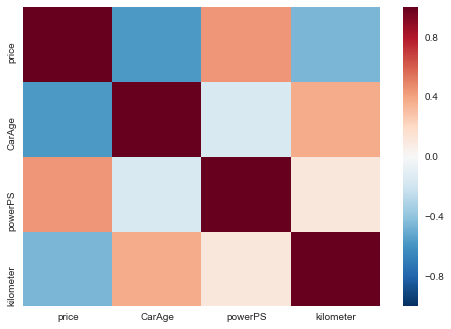

In [33]:
corr = new_CarData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### OLS regression
### create dummy variables

In [34]:
dt_car = new_CarData
dt_car.drop(['name'], axis = 1, inplace = True)
cols_to_transform = ['brand', 'model', 'seller', 'offerType', 'abtest',
                     'vehicleType', 'gearbox', 'fuelType','notRepairedDamage']

df_with_dummies = pd.get_dummies(data =dt_car,  columns = cols_to_transform )

df_with_dummies.head(5)

,price,CarAge,powerPS,kilometer,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,...,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_ja,notRepairedDamage_nein,notRepairedDamage_norep
2,9800,13,163,125000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1500,16,75,150000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3600,9,69,90000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,650,22,102,150000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,2200,13,109,150000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### predict price

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.core import datetools

y = df_with_dummies['price']
X = df_with_dummies.loc[:, df_with_dummies.columns != 'price']


linear = sm.OLS(y, X).fit()
linear.summary()


/Users/rimanakhala/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1902.
Date:                Tue, 26 Sep 2017   Prob (F-statistic):               0.00
Time:                        13:15:34   Log-Likelihood:            -2.2318e+06
No. Observations:              242257   AIC:                         4.464e+06
Df Residuals:                  241952   BIC:                         4.467e+06
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CarAge                   -291.4690      1.167   -249.777      0.000    -293.756    -289.182
powerPS                    29.7307      0.218    136.448      0.000      29.304      30.158
kilometer                  -0.0412      0.000   -254.642      0.000      -0.041      -0.041
brand_alfa_romeo         -414.7996    123.836     -3.350      0.001    -657.515    -172.084
brand_audi                259.5850    116.329      2.231      0.026      31.584     487.586
brand_bmw                4358.0963    253.205     17.212      0.000    3861.820    4854.372
brand_chevrolet         -1032.8787     99.033    -10.430      0.000   -1226.980    -838.777
brand_chrysler          -2693.9821    137.078    -19.653      0.000   -2962.652   -2425.312
brand_citroen            -817.8628     79.763    -10.254      0.000    -974.195    -661.530
brand_dacia             -3312.7502    592.725     -5.589      0.000   -4474.477   -2151.024
brand_daewoo            -1359.1399    212.252     -6.403      0.000   -1775.148    -943.132
brand_daihatsu          -1586.4144    263.142     -6.029      0.000   -2102.166   -1070.663
brand_fiat              -1142.1353     79.067    -14.445      0.000   -1297.104    -987.166
brand_ford               -448.9316     87.259     -5.145      0.000    -619.957    -277.907
brand_honda             -1417.1818    165.498     -8.563      0.000   -1741.553   -1092.811
brand_hyundai           -2592.5472     90.144    -28.760      0.000   -2769.226   -2415.868
brand_jaguar             3227.6151    292.945     11.018      0.000    2653.450    3801.780
brand_jeep                358.9478    167.590      2.142      0.032      30.476     687.420
brand_kia               -2611.8243    127.854    -20.428      0.000   -2862.415   -2361.234
brand_lada                 -4.3528    386.077     -0.011      0.991    -761.054     752.348
brand_lancia               30.2202    272.948      0.111      0.912    -504.751     565.191
brand_land_rover         6598.9641    595.653     11.079      0.000    5431.500    7766.428
brand_mazda             -1767.0128     82.028    -21.542      0.000   -1927.785   -1606.241
brand_mercedes_benz      2646.2588     68.806     38.460      0.000    2511.401    2781.116
brand_mini               4345.9895    290.054     14.983      0.000    3777.492    4914.487
brand_mitsubishi        -1665.7170    107.761    -15.458      0.000   -1876.925   -1454.509
brand_nissan             -790.0927    120.672     -6.547      0.000   -1026.607    -553.578
brand_opel               1257.1656     92.004     13.664      0.000    1076.841    1437.490
brand_peugeot           -1792.0615     80.302    -22.316      0.000   -1949.452   -1634.671
brand_porsche            6905.7684    234.964     29.391      0.000    6445.246    7366.291
brand_renault            -187.6124     97.532  